<a href="https://colab.research.google.com/github/SudiWafula/DATA-ANALYTICS-CAPSTONE-PROJECT/blob/main/Traditional_Machine_Learning_Model(Naive_Bayes)_Ensemble_with_DL_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the relevant libraries for data loading and exploration
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import random
import cv2
from skimage.transform import resize
import pickle

In [ ]:
file_path = '/content/drive/MyDrive/crop_resized_images.pkl'

with open(file_path, 'rb') as file:
    X_array = pickle.load(file)

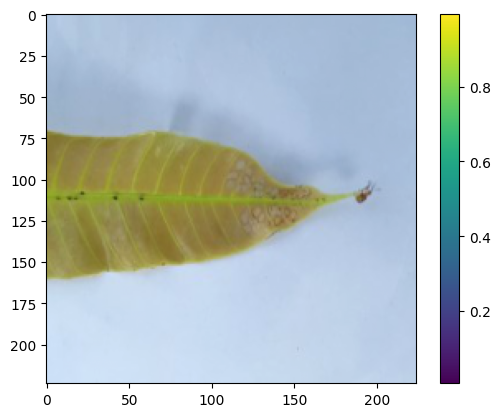

In [ ]:
plt.figure()
plt.imshow(X_array[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
file_path = '/content/drive/My Drive/y_array.pkl'

with open(file_path, 'rb') as f:
    y_array = pickle.load(f)


In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support, precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import learning_curve
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# arrays to store training and testing accuracies
train_accuracies = []
test_accuracies = []
train_precisions = []
test_precisions = []
train_recalls = []
test_recalls = []
train_f1_scores = []
test_f1_scores = []

training_sizes = np.arange(100, len(train_images) + 1, 100)

for size in training_sizes:

    subset_train_images = train_images[:size]
    subset_train_labels = train_labels[:size]

    naive_bayes_classifier = GaussianNB()

    subset_train_images_flat = subset_train_images.reshape(subset_train_images.shape[0], -1)

    test_images_flat = test_images.reshape(test_images.shape[0], -1)

    naive_bayes_classifier.fit(subset_train_images_flat, subset_train_labels)

    train_predictions = naive_bayes_classifier.predict(subset_train_images_flat)
    test_predictions = naive_bayes_classifier.predict(test_images_flat)

    train_accuracy = accuracy_score(subset_train_labels, train_predictions)
    test_accuracy = accuracy_score(test_labels, test_predictions)

    train_precision = precision_score(subset_train_labels, train_predictions, average='macro')
    test_precision = precision_score(test_labels, test_predictions, average='macro')
    train_recall = recall_score(subset_train_labels, train_predictions, average='macro')
    test_recall = recall_score(test_labels, test_predictions, average='macro')
    train_f1 = f1_score(subset_train_labels, train_predictions, average='macro')
    test_f1 = f1_score(test_labels, test_predictions, average='macro')

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_precisions.append(train_precision)
    test_precisions.append(test_precision)
    train_recalls.append(train_recall)
    test_recalls.append(test_recall)
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

    print(f"Training Accuracy (Size {size}): {train_accuracy:.4f}")
    print(f"Testing Accuracy (Size {size}): {test_accuracy:.4f}")
    print(f"Training Precision (Size {size}): {train_precision:.4f}")
    print(f"Testing Precision (Size {size}): {test_precision:.4f}")
    print(f"Training Recall (Size {size}): {train_recall:.4f}")
    print(f"Testing Recall (Size {size}): {test_recall:.4f}")
    print(f"Training F1 Score (Size {size}): {train_f1:.4f}")
    print(f"Testing F1 Score (Size {size}): {test_f1:.4f}")
    print("=" * 40)






Training Accuracy (Size 100): 0.8400
Testing Accuracy (Size 100): 0.3362
Training Precision (Size 100): 0.8533
Testing Precision (Size 100): 0.4204
Training Recall (Size 100): 0.8605
Testing Recall (Size 100): 0.3458
Training F1 Score (Size 100): 0.8502
Testing F1 Score (Size 100): 0.3303
Training Accuracy (Size 200): 0.7100
Testing Accuracy (Size 200): 0.4325
Training Precision (Size 200): 0.7187
Testing Precision (Size 200): 0.4697
Training Recall (Size 200): 0.7161
Testing Recall (Size 200): 0.4362
Training F1 Score (Size 200): 0.7137
Testing F1 Score (Size 200): 0.4313
Training Accuracy (Size 300): 0.6933
Testing Accuracy (Size 300): 0.5225
Training Precision (Size 300): 0.6983
Testing Precision (Size 300): 0.5400
Training Recall (Size 300): 0.6961
Testing Recall (Size 300): 0.5249
Training F1 Score (Size 300): 0.6950
Testing F1 Score (Size 300): 0.5261
Training Accuracy (Size 400): 0.6825
Testing Accuracy (Size 400): 0.5325
Training Precision (Size 400): 0.6861
Testing Precision (

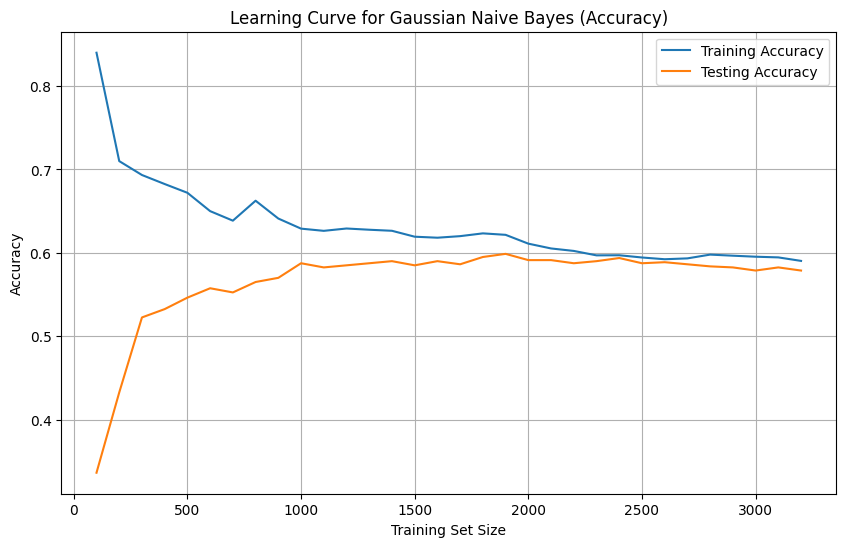

In [ ]:
# learning curve for accuracy
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_accuracies, label="Training Accuracy")
plt.plot(training_sizes, test_accuracies, label="Testing Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Gaussian Naive Bayes (Accuracy)")
plt.legend()
plt.grid(True)
plt.show()

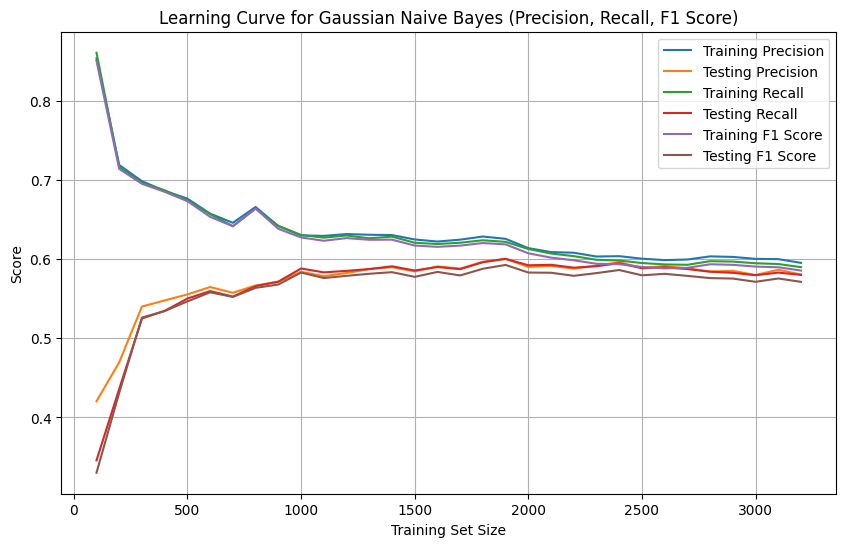

In [ ]:
# learning curve for precision, recall, and F1 score
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_precisions, label="Training Precision")
plt.plot(training_sizes, test_precisions, label="Testing Precision")
plt.plot(training_sizes, train_recalls, label="Training Recall")
plt.plot(training_sizes, test_recalls, label="Testing Recall")
plt.plot(training_sizes, train_f1_scores, label="Training F1 Score")
plt.plot(training_sizes, test_f1_scores, label="Testing F1 Score")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.title("Learning Curve for Gaussian Naive Bayes (Precision, Recall, F1 Score)")
plt.legend()
plt.grid(True)
plt.show()

Training Accuracy (Size 100): 0.8400
Testing Accuracy (Size 100): 0.3362
Training Precision (Size 100): 0.8533
Testing Precision (Size 100): 0.4204
Training Recall (Size 100): 0.8605
Testing Recall (Size 100): 0.3458
Training F1 Score (Size 100): 0.8502
Testing F1 Score (Size 100): 0.3303
Cross-Validation Accuracy (Size 100): 0.2900
Training Accuracy (Size 200): 0.7100
Testing Accuracy (Size 200): 0.4325
Training Precision (Size 200): 0.7187
Testing Precision (Size 200): 0.4697
Training Recall (Size 200): 0.7161
Testing Recall (Size 200): 0.4362
Training F1 Score (Size 200): 0.7137
Testing F1 Score (Size 200): 0.4313
Cross-Validation Accuracy (Size 200): 0.3250
Training Accuracy (Size 300): 0.6933
Testing Accuracy (Size 300): 0.5225
Training Precision (Size 300): 0.6983
Testing Precision (Size 300): 0.5400
Training Recall (Size 300): 0.6961
Testing Recall (Size 300): 0.5249
Training F1 Score (Size 300): 0.6950
Testing F1 Score (Size 300): 0.5261
Cross-Validation Accuracy (Size 300): 0.

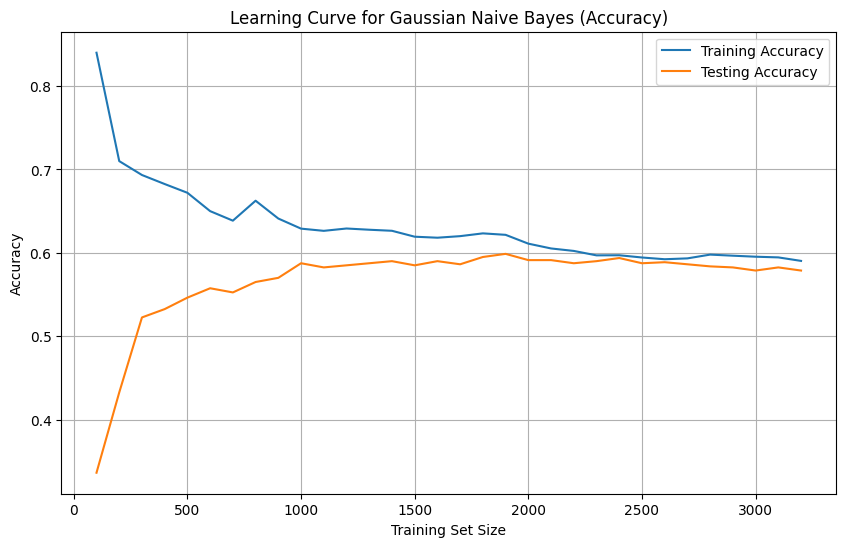

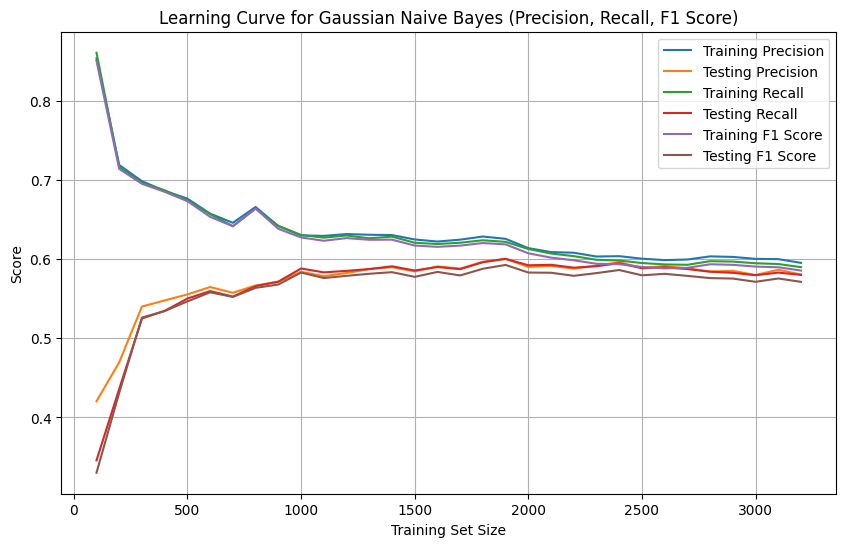

In [ ]:
# Naive Bayes with cross Validation cv=3
train_accuracies = []
test_accuracies = []
train_precisions = []
test_precisions = []
train_recalls = []
test_recalls = []
train_f1_scores = []
test_f1_scores = []

training_sizes = np.arange(100, len(train_images) + 1, 100)

for size in training_sizes:

    subset_train_images = train_images[:size]
    subset_train_labels = train_labels[:size]
    naive_bayes_classifier = GaussianNB()
    subset_train_images_flat = subset_train_images.reshape(subset_train_images.shape[0], -1)
    test_images_flat = test_images.reshape(test_images.shape[0], -1)
    naive_bayes_classifier.fit(subset_train_images_flat, subset_train_labels)
    train_predictions = naive_bayes_classifier.predict(subset_train_images_flat)
    test_predictions = naive_bayes_classifier.predict(test_images_flat)
    train_accuracy = accuracy_score(subset_train_labels, train_predictions)
    test_accuracy = accuracy_score(test_labels, test_predictions)

    train_precision = precision_score(subset_train_labels, train_predictions, average='macro')
    test_precision = precision_score(test_labels, test_predictions, average='macro')
    train_recall = recall_score(subset_train_labels, train_predictions, average='macro')
    test_recall = recall_score(test_labels, test_predictions, average='macro')
    train_f1 = f1_score(subset_train_labels, train_predictions, average='macro')
    test_f1 = f1_score(test_labels, test_predictions, average='macro')

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_precisions.append(train_precision)
    test_precisions.append(test_precision)
    train_recalls.append(train_recall)
    test_recalls.append(test_recall)
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)


    print(f"Training Accuracy (Size {size}): {train_accuracy:.4f}")
    print(f"Testing Accuracy (Size {size}): {test_accuracy:.4f}")
    print(f"Training Precision (Size {size}): {train_precision:.4f}")
    print(f"Testing Precision (Size {size}): {test_precision:.4f}")
    print(f"Training Recall (Size {size}): {train_recall:.4f}")
    print(f"Testing Recall (Size {size}): {test_recall:.4f}")
    print(f"Training F1 Score (Size {size}): {train_f1:.4f}")
    print(f"Testing F1 Score (Size {size}): {test_f1:.4f}")
    print("=" * 40)


    cross_val_scores = cross_val_score(naive_bayes_classifier, subset_train_images_flat, subset_train_labels, cv=3, scoring='accuracy')
    print(f"Cross-Validation Accuracy (Size {size}): {np.mean(cross_val_scores):.4f}")
    print("=" * 40)

plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_accuracies, label="Training Accuracy")
plt.plot(training_sizes, test_accuracies, label="Testing Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Gaussian Naive Bayes (Accuracy)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_precisions, label="Training Precision")
plt.plot(training_sizes, test_precisions, label="Testing Precision")
plt.plot(training_sizes, train_recalls, label="Training Recall")
plt.plot(training_sizes, test_recalls, label="Testing Recall")
plt.plot(training_sizes, train_f1_scores, label="Training F1 Score")
plt.plot(training_sizes, test_f1_scores, label="Testing F1 Score")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.title("Learning Curve for Gaussian Naive Bayes (Precision, Recall, F1 Score)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

class PrintAccuracyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get('accuracy') * 100
        print(f'Accuracy: {accuracy:.2f}%')

def seventh_advanced_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def train_advanced_cnn_model(model, train_images, train_labels, test_images, test_labels, num_epochs, batch_size):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

    learning_rate = 0.001
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    print_accuracy_callback = PrintAccuracyCallback()
    model.summary()
    advanced_cnn_hist = model.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size,
                                  validation_data=(test_images, test_labels),
                                  callbacks=[early_stopping, reduce_lr, print_accuracy_callback])
    return advanced_cnn_hist

# constants
image_height = 224
image_width = 224
num_channels = 3
num_classes = 8
num_epochs = 30
batch_size = 15

model7 = seventh_advanced_cnn_model(input_shape=(image_height, image_width, num_channels), num_classes=num_classes)

advanced_cnn_hist = train_advanced_cnn_model(model7, train_images, train_labels, test_images, test_labels, num_epochs, batch_size)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       7

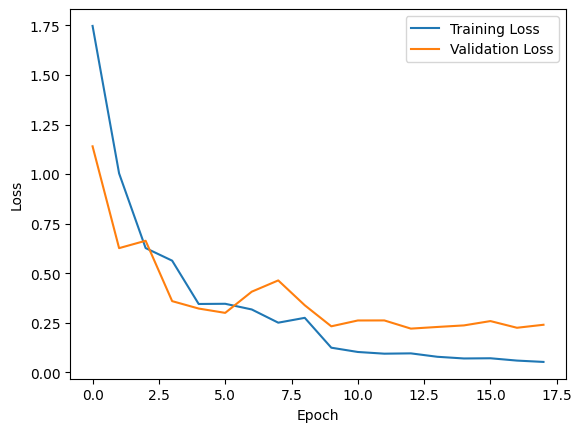

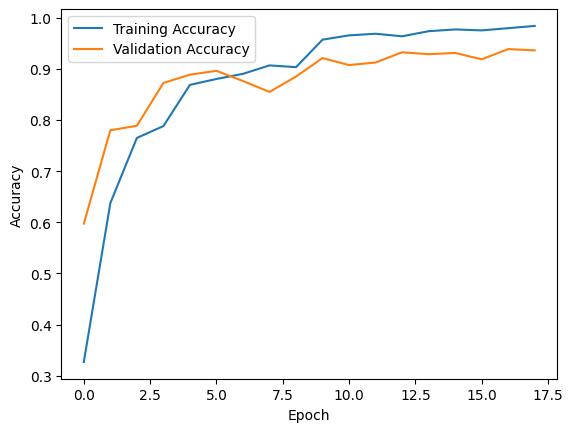

In [ ]:
# training and validation loss
plt.plot(advanced_cnn_hist.history['loss'], label='Training Loss')
plt.plot(advanced_cnn_hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# training and validation accuracy
plt.plot(advanced_cnn_hist.history['accuracy'], label='Training Accuracy')
plt.plot(advanced_cnn_hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

25/25 [==============================] - 2s 88ms/step


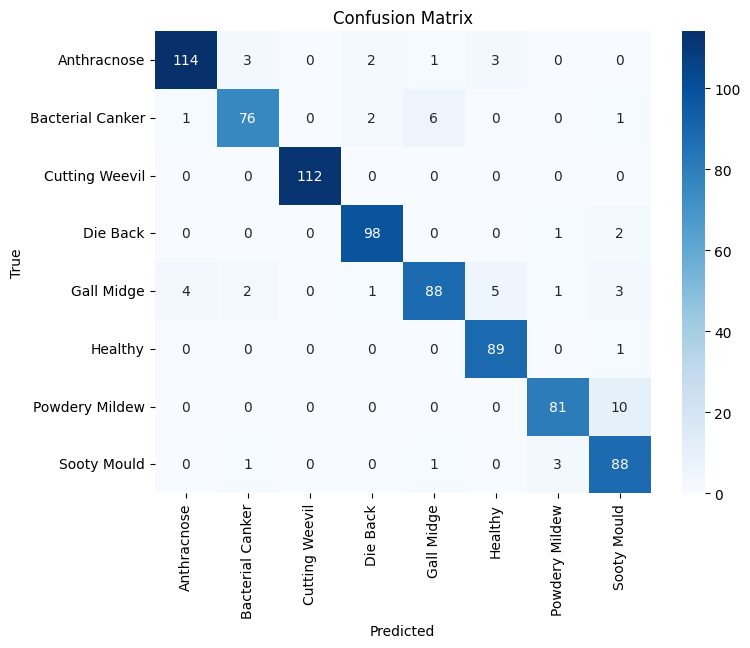

In [ ]:
preds = model7.predict(test_images)
predicted_labels = np.argmax(preds, axis=1)

class_names = [
    "Anthracnose",
    "Bacterial Canker",
    "Cutting Weevil",
    "Die Back",
    "Gall Midge",
    "Healthy",
    "Powdery Mildew",
    "Sooty Mould"
]

conf_mat_adv = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_adv, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
test_labels_one_hot = to_categorical(test_labels, num_classes)

predicted_probabilities7 = model7.predict(test_images)

roc_curves7 = []
auc_scores7 = []

for class_index in range(num_classes):
    fpr, tpr, _ = roc_curve(test_labels_one_hot[:, class_index], predicted_probabilities7[:, class_index])
    roc_curves7.append((fpr, tpr))
    auc_scores7.append(auc(fpr, tpr))

25/25 [==============================] - 2s 84ms/step


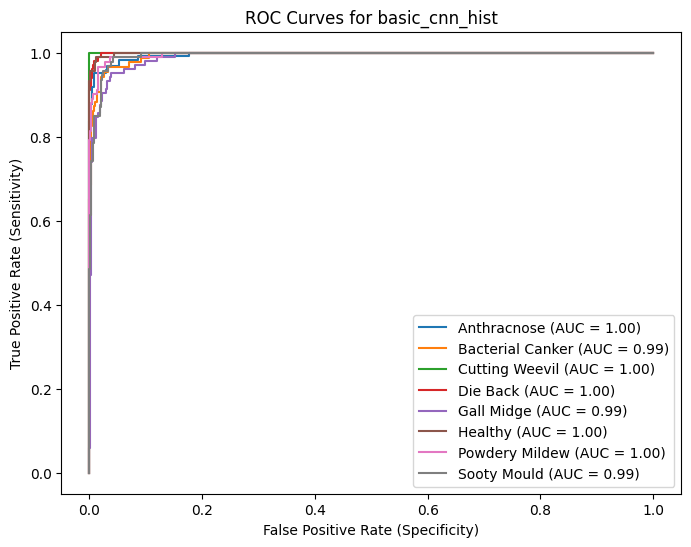

In [ ]:
class_names = [
    "Anthracnose",
    "Bacterial Canker",
    "Cutting Weevil",
    "Die Back",
    "Gall Midge",
    "Healthy",
    "Powdery Mildew",
    "Sooty Mould"
]

plt.figure(figsize=(8, 6))

for class_index in range(num_classes):
    fpr, tpr = roc_curves7[class_index]
    auc_score7 = auc(fpr, tpr)

    label = f'{class_names[class_index]} (AUC = {auc_score7:.2f})'

    plt.plot(fpr, tpr, label=label)

plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curves for basic_cnn_hist')
plt.legend(loc='lower right')

plt.show()

In [ ]:
y_true7 = test_labels  # True labels
y_pred7 = predicted_probabilities7.argmax(axis=1)  # Predicted labels

accuracy7 = accuracy_score(y_true7, y_pred7)
print(f'Accuracy: {accuracy7:.2f}')

precision7 = precision_score(y_true7, y_pred7, average='macro')
recall7 = recall_score(y_true7, y_pred7, average='macro')
f1_7 = f1_score(y_true7, y_pred7, average='macro')

print(f'Precision: {precision7:.2f}')
print(f'Recall: {recall7:.2f}')
print(f'F1-Score: {f1_7:.2f}')

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-Score: 0.93


In [ ]:
def predict_ensemble(classifier, cnn_model, data):
    # Predict with the Naive Bayes Classifier
    nb_predictions = classifier.predict(data.reshape(data.shape[0], -1))

    # Convert the Naive Bayes predictions to one-hot encoded vectors
    nb_predictions_onehot = np.zeros((data.shape[0], num_classes))
    nb_predictions_onehot[np.arange(data.shape[0]), nb_predictions] = 1

    # Predict with the CNN model
    cnn_predictions = cnn_model.predict(data)

    # Combine predictions using simple averaging
    ensemble_predictions = (nb_predictions_onehot + cnn_predictions) / 2

    # Convert ensemble predictions to class labels
    ensemble_labels = np.argmax(ensemble_predictions, axis=1)

    return ensemble_labels


In [ ]:
for size in training_sizes:

    subset_train_images = train_images[:size]
    subset_train_labels = train_labels[:size]

    naive_bayes_classifier = GaussianNB()

    subset_train_images_flat = subset_train_images.reshape(subset_train_images.shape[0], -1)

    # Fit the Naive Bayes Classifier on the training data
    naive_bayes_classifier.fit(subset_train_images_flat, subset_train_labels)

    test_images_flat = test_images.reshape(test_images.shape[0], -1)

    # Make predictions using the ensemble on test data
    ensemble_test_predictions = predict_ensemble(naive_bayes_classifier, model7, test_images)

    # Calculate accuracy of the ensemble
    ensemble_accuracy = accuracy_score(test_labels, ensemble_test_predictions)
    print(f"Ensemble Accuracy (Size {size}): {ensemble_accuracy:.2f}")


25/25 [==============================] - 2s 76ms/step
Ensemble Accuracy (Size 100): 0.34
25/25 [==============================] - 2s 74ms/step
Ensemble Accuracy (Size 200): 0.43
25/25 [==============================] - 2s 78ms/step
Ensemble Accuracy (Size 300): 0.52
25/25 [==============================] - 2s 74ms/step
Ensemble Accuracy (Size 400): 0.53
25/25 [==============================] - 2s 75ms/step
Ensemble Accuracy (Size 500): 0.55
25/25 [==============================] - 2s 74ms/step
Ensemble Accuracy (Size 600): 0.56
25/25 [==============================] - 2s 73ms/step
Ensemble Accuracy (Size 700): 0.55
25/25 [==============================] - 2s 85ms/step
Ensemble Accuracy (Size 800): 0.56
25/25 [==============================] - 2s 80ms/step
Ensemble Accuracy (Size 900): 0.57
25/25 [==============================] - 2s 77ms/step
Ensemble Accuracy (Size 1000): 0.59
25/25 [==============================] - 2s 77ms/step
Ensemble Accuracy (Size 1100): 0.58
25/25 [============

In [ ]:

def predict_ensemble(classifier, cnn_model, data, cnn_weight=0.7):
    # Predict with the Naive Bayes Classifier
    nb_predictions = classifier.predict(data.reshape(data.shape[0], -1))

    # Convert the Naive Bayes predictions to one-hot encoded vectors
    num_classes = cnn_model.output_shape[1]  # Assuming cnn_model is a Keras model
    nb_predictions_onehot = np.zeros((data.shape[0], num_classes))
    nb_predictions_onehot[np.arange(data.shape[0]), nb_predictions] = 1

    # Predict with the CNN model
    cnn_predictions = cnn_model.predict(data)

    # Calculate weighted ensemble predictions
    ensemble_predictions = (cnn_weight * cnn_predictions) + ((1 - cnn_weight) * nb_predictions_onehot)

    # Convert ensemble predictions to class labels
    ensemble_labels = np.argmax(ensemble_predictions, axis=1)

    return ensemble_labels

for size in training_sizes:
    subset_train_images = train_images[:size]
    subset_train_labels = train_labels[:size]

    naive_bayes_classifier = GaussianNB()

    subset_train_images_flat = subset_train_images.reshape(subset_train_images.shape[0], -1)

    # Fit the Naive Bayes Classifier on the training data
    naive_bayes_classifier.fit(subset_train_images_flat, subset_train_labels)

    test_images_flat = test_images.reshape(test_images.shape[0], -1)

    # Make predictions using the ensemble on test data with 70% weight to CNN
    ensemble_test_predictions = predict_ensemble(naive_bayes_classifier, model7, test_images, cnn_weight=0.7)

    # Calculate accuracy of the ensemble
    ensemble_accuracy = accuracy_score(test_labels, ensemble_test_predictions)
    print(f"Ensemble Accuracy (Size {size}): {ensemble_accuracy:.2f}")


25/25 [==============================] - 2s 91ms/step
Ensemble Accuracy (Size 100): 0.93
25/25 [==============================] - 2s 86ms/step
Ensemble Accuracy (Size 200): 0.93
25/25 [==============================] - 2s 82ms/step
Ensemble Accuracy (Size 300): 0.93
25/25 [==============================] - 2s 81ms/step
Ensemble Accuracy (Size 400): 0.93
25/25 [==============================] - 2s 81ms/step
Ensemble Accuracy (Size 500): 0.93
25/25 [==============================] - 2s 80ms/step
Ensemble Accuracy (Size 600): 0.93
25/25 [==============================] - 2s 76ms/step
Ensemble Accuracy (Size 700): 0.93
25/25 [==============================] - 2s 74ms/step
Ensemble Accuracy (Size 800): 0.93
25/25 [==============================] - 2s 90ms/step
Ensemble Accuracy (Size 900): 0.93
25/25 [==============================] - 2s 82ms/step
Ensemble Accuracy (Size 1000): 0.93
25/25 [==============================] - 2s 79ms/step
Ensemble Accuracy (Size 1100): 0.93
25/25 [============

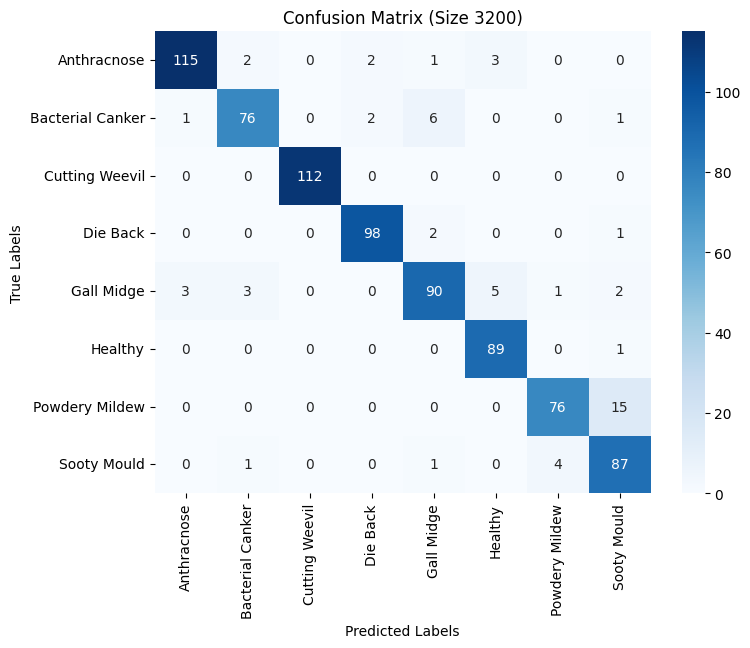

In [ ]:
cm = confusion_matrix(test_labels, ensemble_test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f"Confusion Matrix (Size {size})")
plt.show()

25/25 [==============================] - 2s 85ms/step
Ensemble Accuracy (Size 100): 0.93


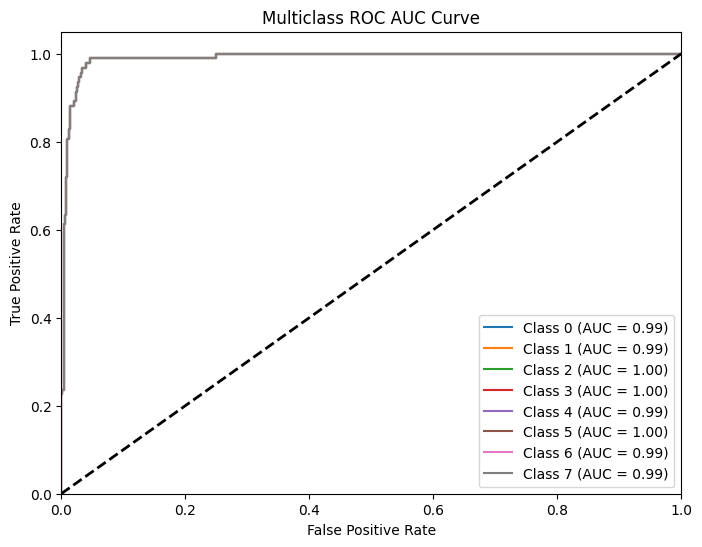

25/25 [==============================] - 2s 81ms/step
Ensemble Accuracy (Size 200): 0.93


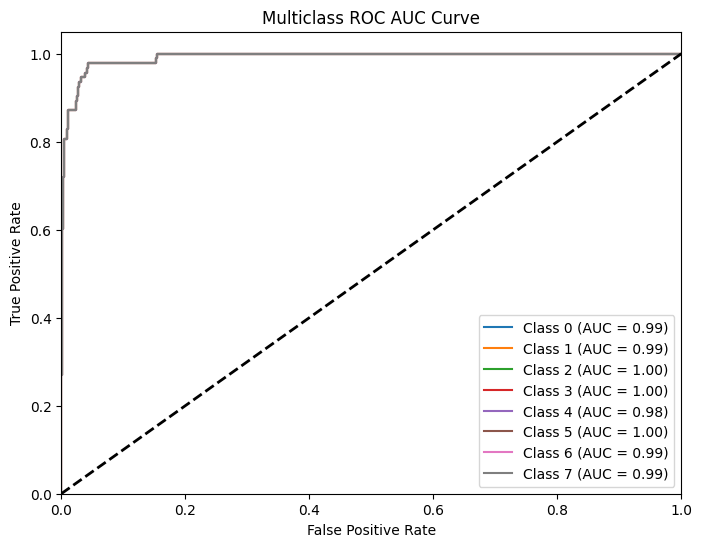

25/25 [==============================] - 2s 82ms/step
Ensemble Accuracy (Size 300): 0.93


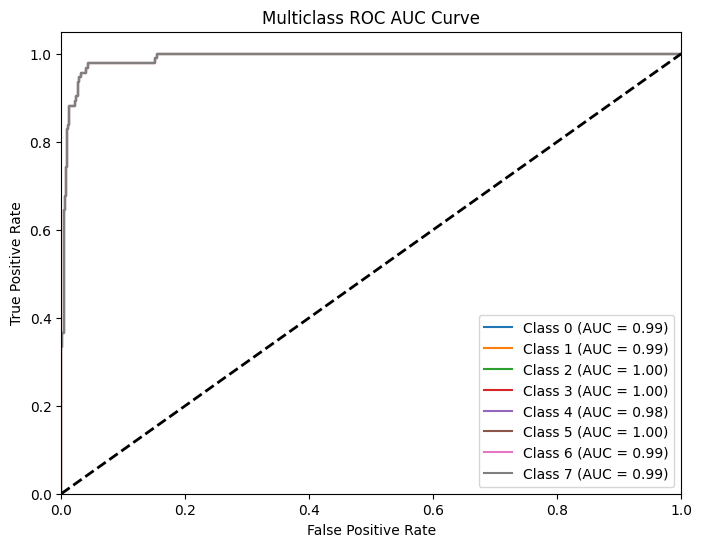

25/25 [==============================] - 2s 84ms/step
Ensemble Accuracy (Size 400): 0.93


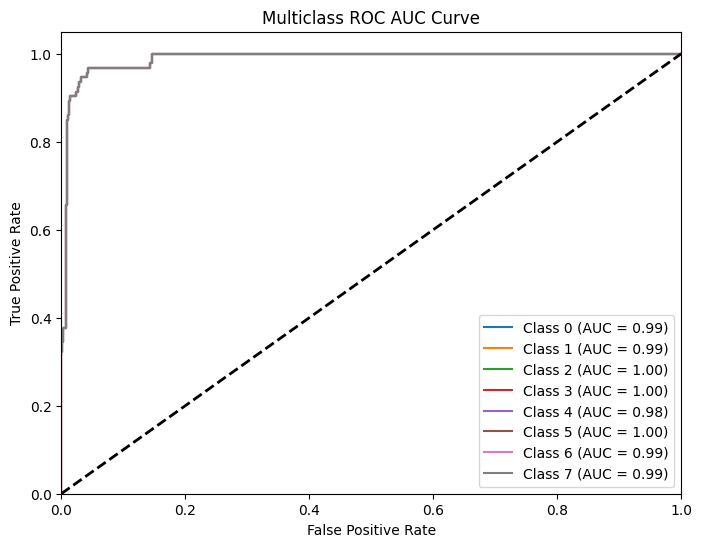

25/25 [==============================] - 2s 82ms/step
Ensemble Accuracy (Size 500): 0.93


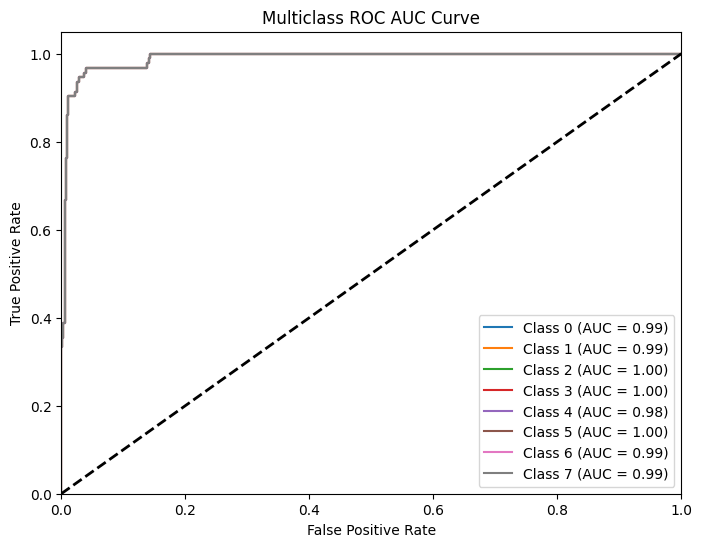

In [ ]:

from sklearn.metrics import accuracy_score, roc_curve, auc
from keras.utils import to_categorical

def predict_ensemble(classifier, cnn_model, data, cnn_weight=0.7):
    nb_predictions = classifier.predict(data.reshape(data.shape[0], -1))
    num_classes = cnn_model.output_shape[1]
    nb_predictions_onehot = np.zeros((data.shape[0], num_classes))
    nb_predictions_onehot[np.arange(data.shape[0]), nb_predictions] = 1
    cnn_predictions = cnn_model.predict(data)
    ensemble_predictions = (cnn_weight * cnn_predictions) + ((1 - cnn_weight) * nb_predictions_onehot)
    ensemble_labels = np.argmax(ensemble_predictions, axis=1)

    return ensemble_labels, ensemble_predictions

for size in training_sizes:
    subset_train_images = train_images[:size]
    subset_train_labels = train_labels[:size]

    naive_bayes_classifier = GaussianNB()

    subset_train_images_flat = subset_train_images.reshape(subset_train_images.shape[0], -1)
    naive_bayes_classifier.fit(subset_train_images_flat, subset_train_labels)
    test_images_flat = test_images.reshape(test_images.shape[0], -1)
    ensemble_test_labels, ensemble_test_predictions = predict_ensemble(naive_bayes_classifier, model7, test_images, cnn_weight=0.7)


    ensemble_accuracy = accuracy_score(test_labels, ensemble_test_labels)
    print(f"Ensemble Accuracy (Size {size}): {ensemble_accuracy:.2f}")


    num_classes = len(np.unique(test_labels))
    test_labels_onehot = to_categorical(test_labels, num_classes)

    # Calculate ROC AUC for each class
    roc_auc_scores = []
    for class_idx in range(num_classes):
        fpr, tpr, _ = roc_curve(test_labels_onehot[:, class_idx], ensemble_test_predictions[:, class_idx])
        roc_auc = auc(fpr, tpr)
        roc_auc_scores.append(roc_auc)

    # Plot ROC AUC curves
    plt.figure(figsize=(8, 6))
    for class_idx in range(num_classes):
        plt.plot(fpr, tpr, label=f"Class {class_idx} (AUC = {roc_auc_scores[class_idx]:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC AUC Curve')
    plt.legend(loc="lower right")
    plt.show()
